# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix, solvers
from numpy import linalg

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0: -1.2293e+01 -2.8391e+01  1e+02  1e+01  2e+00
 1: -2.5419e+01 -3.4794e+01  3e+01  3e+00  5e-01
 2: -3.6313e+01 -4.5893e+01  3e+01  2e+00  4e-01
 3: -4.3790e+01 -4.5825e+01  8e+00  4e-01  7e-02
 4: -4.3706e+01 -4.3902e+01  5e-01  2e-02  4e-03
 5: -4.3700e+01 -4.3727e+01  3e-02  5e-05  8e-06
 6: -4.3721e+01 -4.3723e+01  1e-03  2e-06  4e-07
 7: -4.3723e+01 -4.3723e+01  1e-05  2e-08  4e-09
Optimal solution found.
[ True False False False False False False False False False False False
  True False False False False False False False False False False False
  True False False False False False False  True False False False False]
This is sv_y
[ 1.  1. -1. -1.]
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF
Move graph down for PDF


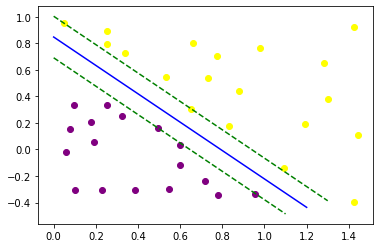

In [10]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]

def kernel(x1, x2):
        return np.dot(x1, x2)

class SVM(object):

    def __init__(self, kernel=kernel):
        self.kernel = kernel
            
    def fit(self, X, y):
        n_samp, n_feat = X.shape

        K = np.zeros((n_samp, n_samp))
        for i in range(n_samp):
            for j in range(n_samp):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samp) * -1)
        A = cvxopt.matrix(y, (1,n_samp))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(np.ones(n_samp) * -1))
        h = cvxopt.matrix(np.zeros(n_samp))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        a = np.ravel(solution['x'])

        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print(sv)
        print("This is sv_y")
        print(self.sv_y)

        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        if self.kernel == kernel:
            self.w = np.zeros(n_feat)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def Input(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.Input(X))

if __name__ == "__main__":
   
    def SVM_Plot(X1, X2, model):
        def f(x, w, b, c=0):
            return (-w[0] * x - b + c) / w[1]
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        print("Move graph down for PDF")
        plt.plot(X1[:,0], X1[:,1], "o", color="yellow")
        plt.plot(X2[:,0], X2[:,1], "o", color="purple")
        
        a0 = 0; a1 = f(a0, model.w, model.b)
        b0 = 1.2; b1 = f(b0, model.w, model.b)
        plt.plot([a0,b0], [a1,b1], "k", c="blue")
  
        a0 = 0; a1 = f(a0, model.w, model.b, 1)
        b0 = 1.3; b1 = f(b0, model.w, model.b, 1)
        plt.plot([a0,b0], [a1,b1], "k--", c="green")

        a0 = 0; a1 = f(a0, model.w, model.b, -1)
        b0 = 1.1; b1 = f(b0, model.w, model.b, -1)
        plt.plot([a0,b0], [a1,b1], "k--", c="green")
 
        plt.show()
      
    def SVM_Model():

        model = SVM()
        model.fit(X, y)

        SVM_Plot(X[y==1], X[y==-1], model)


SVM_Model()

## b) and c) : Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0: -3.0198e+01 -1.1038e+01  6e+02  3e+01  6e-14
 1: -3.0101e+00 -1.0669e+01  3e+01  8e-01  6e-14
 2: -2.1035e+00 -6.2126e+00  6e+00  1e-01  8e-15
 3: -2.0595e+00 -2.6797e+00  7e-01  1e-02  4e-15
 4: -2.1895e+00 -2.4041e+00  2e-01  3e-03  4e-15
 5: -2.2354e+00 -2.3269e+00  1e-01  1e-03  4e-15
 6: -2.2630e+00 -2.2889e+00  3e-02  2e-04  4e-15
 7: -2.2726e+00 -2.2755e+00  3e-03  2e-16  4e-15
 8: -2.2739e+00 -2.2740e+00  7e-05  9e-17  4e-15
 9: -2.2739e+00 -2.2739e+00  7e-07  2e-16  4e-15
Optimal solution found.
[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False  True
  True  True False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False False False False
  True  True  True  True  True  True  True  True  True  True  True  True


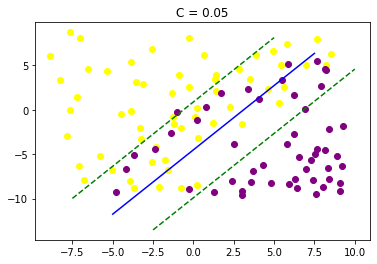

     pcost       dcost       gap    pres   dres
 0: -3.1636e+01 -2.2062e+01  7e+02  2e+01  5e-14
 1: -5.6226e+00 -2.0649e+01  5e+01  1e+00  7e-14
 2: -4.1036e+00 -1.1247e+01  1e+01  2e-01  1e-14
 3: -4.1158e+00 -5.1806e+00  1e+00  2e-02  8e-15
 4: -4.3486e+00 -4.7028e+00  4e-01  5e-03  7e-15
 5: -4.4340e+00 -4.5760e+00  2e-01  1e-03  8e-15
 6: -4.4708e+00 -4.5230e+00  5e-02  3e-04  9e-15
 7: -4.4851e+00 -4.5034e+00  2e-02  8e-05  6e-15
 8: -4.4920e+00 -4.4945e+00  3e-03  6e-06  8e-15
 9: -4.4931e+00 -4.4932e+00  3e-05  8e-08  8e-15
10: -4.4931e+00 -4.4931e+00  3e-07  8e-10  8e-15
Optimal solution found.
[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False  True
  True  True False False False False False False False False False False
 False False False False False  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True False False False False
  True  True  True  True

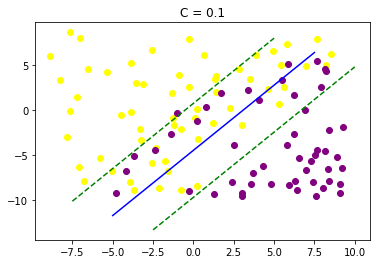

     pcost       dcost       gap    pres   dres
 0: -5.7505e+01 -2.5873e+02  1e+03  3e+00  1e-13
 1: -4.0125e+01 -1.6918e+02  2e+02  3e-01  8e-14
 2: -3.7704e+01 -5.8598e+01  2e+01  2e-02  6e-14
 3: -4.1093e+01 -5.0709e+01  1e+01  8e-03  7e-14
 4: -4.2959e+01 -4.6523e+01  4e+00  2e-03  7e-14
 5: -4.3779e+01 -4.5280e+01  2e+00  7e-04  8e-14
 6: -4.4015e+01 -4.4900e+01  9e-01  2e-04  7e-14
 7: -4.4311e+01 -4.4534e+01  2e-01  5e-05  8e-14
 8: -4.4341e+01 -4.4483e+01  1e-01  3e-05  8e-14
 9: -4.4388e+01 -4.4429e+01  4e-02  5e-15  8e-14
10: -4.4407e+01 -4.4408e+01  8e-04  7e-15  9e-14
11: -4.4407e+01 -4.4407e+01  8e-06  1e-14  9e-14
Optimal solution found.
[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False  True
  True  True False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True

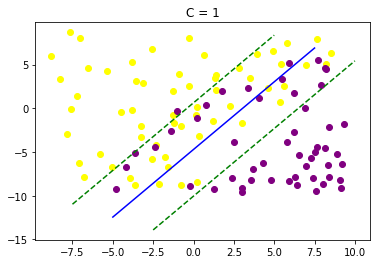

     pcost       dcost       gap    pres   dres
 0: -2.8226e+03 -7.5705e+05  2e+06  6e-01  6e-12
 1: -2.4424e+03 -1.7816e+05  2e+05  1e-02  5e-12
 2: -2.6870e+03 -8.8257e+03  6e+03  3e-04  4e-12
 3: -3.5792e+03 -5.5403e+03  2e+03  8e-05  4e-12
 4: -3.8293e+03 -5.3116e+03  1e+03  5e-05  5e-12
 5: -4.0971e+03 -4.8435e+03  7e+02  2e-05  6e-12
 6: -4.2526e+03 -4.6780e+03  4e+02  1e-05  6e-12
 7: -4.3960e+03 -4.4924e+03  1e+02  4e-07  8e-12
 8: -4.4074e+03 -4.4687e+03  6e+01  1e-07  8e-12
 9: -4.4342e+03 -4.4356e+03  1e+00  2e-09  8e-12
10: -4.4348e+03 -4.4348e+03  6e-02  1e-10  7e-12
11: -4.4348e+03 -4.4348e+03  1e-03  2e-12  9e-12
Optimal solution found.
[ True  True  True  True  True  True False False False False False False
  True  True False False False False False False  True False False  True
  True  True  True False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True

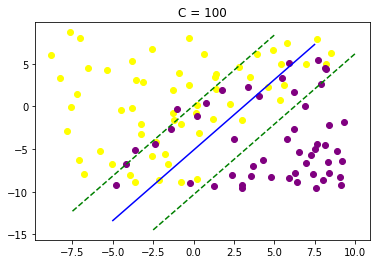

     pcost       dcost       gap    pres   dres
 0:  8.1127e+09 -7.3857e+13  2e+14  6e-01  7e-08
 1:  1.8686e+10 -1.6606e+13  2e+13  9e-03  3e-05
 2: -1.4230e+07 -2.8241e+11  3e+11  1e-04  4e-07
 3: -2.6039e+07 -2.9005e+09  3e+09  1e-06  4e-08
 4: -2.6381e+07 -1.0339e+08  8e+07  3e-08  4e-08
 5: -3.4041e+07 -5.7464e+07  2e+07  8e-09  5e-08
 6: -3.7746e+07 -5.3491e+07  2e+07  5e-09  6e-08
 7: -4.0548e+07 -4.9490e+07  9e+06  2e-09  7e-08
 8: -4.2701e+07 -4.6567e+07  4e+06  6e-10  6e-08
 9: -4.3915e+07 -4.5004e+07  1e+06  5e-09  8e-08
10: -4.4016e+07 -4.4780e+07  8e+05  3e-09  7e-08
11: -4.4290e+07 -4.4418e+07  1e+05  3e-09  9e-08
12: -4.4346e+07 -4.4349e+07  3e+03  2e-09  8e-08
13: -4.4347e+07 -4.4347e+07  2e+02  7e-09  8e-08
14: -4.4347e+07 -4.4347e+07  2e+00  4e-09  8e-08
Optimal solution found.
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  Tru

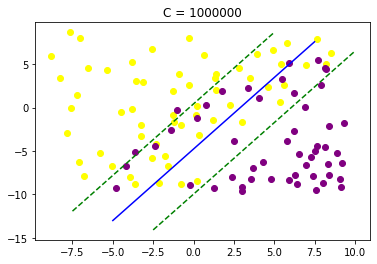

In [5]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]

class SVM(object):

    def __init__(self, kernel=kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
            
    def kernel(x1, x2):
        return np.dot(x1, x2)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
        
        In = np.diag(np.ones(n_samples) * -1)
        In2 = np.identity(n_samples)
        G = cvxopt.matrix(np.vstack((In, In2)))
        In = np.zeros(n_samples)
        In2 = np.ones(n_samples) * self.C
        h = cvxopt.matrix(np.hstack((In, In2)))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        a = np.ravel(solution['x'])

        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print(sv)
        print("This is sv_y")
        print(self.sv_y)

        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        if self.kernel == kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def Input(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.Input(X))

if __name__ == "__main__":  
    def SVM_Plot(X1, X2, model, CVal):
        def f(x, w, b, c=0):
            return (-w[0] * x - b + c) / w[1]

        plt.plot(X1[:,0], X1[:,1], "o", c="yellow")
        plt.plot(X2[:,0], X2[:,1], "o", c="purple")

        a0 = -5; a1 = f(a0, model.w, model.b)
        b0 = 7.5; b1 = f(b0, model.w, model.b)
        plt.plot([a0,b0], [a1,b1], "k", c="blue")

        a0 = -7.5; a1 = f(a0, model.w, model.b, 1)
        b0 = 5; b1 = f(b0, model.w, model.b, 1)
        plt.plot([a0,b0], [a1,b1], "k--", c="green")

        a0 = -2.5; a1 = f(a0, model.w, model.b, -1)
        b0 = 10; b1 = f(b0, model.w, model.b, -1)
        plt.plot([a0,b0], [a1,b1], "k--", c="green")
        plt.title("C = " + str(CVal))
        plt.show()

    def SVM_Model(CVal=None):
        model = SVM(C=CVal)
        model.fit(X, y)
        SVM_Plot(X[y==1], X[y==-1], model, CVal)
    
SVM_Model(CVal=0.05)
SVM_Model(CVal=0.1)
SVM_Model(CVal=1)
SVM_Model(CVal=100)
SVM_Model(CVal=1000000)    

### Explain your observations here:

In [4]:
#Higher values of C require more computing power and
#Higher values of C punish points outside the margins 
#harsher because of C(Summation)*error